<a href="https://colab.research.google.com/github/Suchi102005/Customer_segmentation/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📑** Customer Segmentation & Cluster Classification Report**

Sumitted By : Narasingu Sai Suchendar

**1. Introduction**

Retail businesses often need to understand their customers to improve marketing, product placement, and personalized offers. Customer segmentation groups customers into clusters with similar characteristics.

**This project applies:**

Unsupervised ML → KMeans, Hierarchical Clustering, DBSCAN.

Supervised ML → Logistic Regression, Elastic Net.

The goal: segment customers, then build predictive models that can classify new customers into clusters.

**2. Dataset**

Source: Mall Customers Dataset

Columns Used:

Age

Annual Income (k$)

Spending Score (1–100)

Gender encoded as numeric (0 = Female, 1 = Male).

Data scaled using StandardScaler.

**3. Methodology**
Step 1: Clustering (Unsupervised ML)

**KMeans**

Groups customers by minimizing distance to cluster centroids.


Chosen k = 5 clusters (Elbow Method).

**Hierarchical Clustering**

Agglomerative method using Ward’s linkage (minimizes variance when merging clusters).

Builds a dendrogram, cut at 5 clusters.

**DBSCAN**

Groups customers based on density of points.

Parameters: eps=0.6, min_samples=5.

Detects noise points (-1 label).

**Step 2: Supervised Models**

Cluster labels were treated as target variables.

**Logistic Regression**

Multi-class classification (One-vs-Rest).


Evaluated using accuracy, precision, recall, F1-score.

**Elastic Net Regression**

Predicts cluster IDs as numeric values.

Combines L1 (Lasso) and L2 (Ridge):


Evaluated using Mean Squared Error (MSE).


===== KMeans =====
Logistic Regression Accuracy (KMeans): 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         6
           3       0.93      1.00      0.97        14
           4       1.00      0.85      0.92        13

    accuracy                           0.97        60
   macro avg       0.98      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


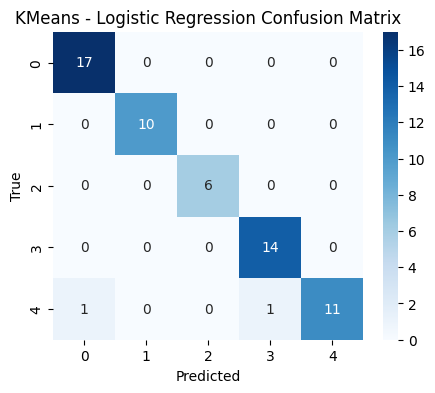

Elastic Net MSE: 1.1962438990711146


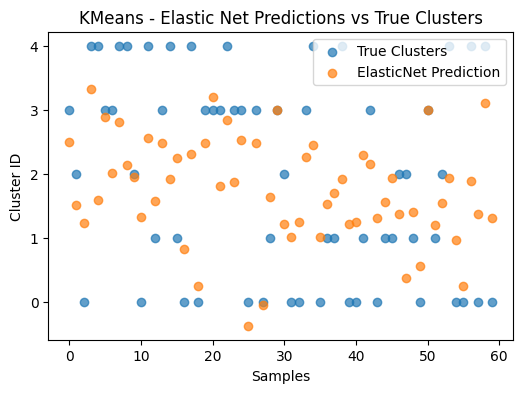


===== Hierarchical =====
Logistic Regression Accuracy (Hierarchical): 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92        21
           1       0.86      0.92      0.89        13
           2       0.90      1.00      0.95         9
           3       0.92      1.00      0.96        12
           4       1.00      1.00      1.00         5

    accuracy                           0.93        60
   macro avg       0.94      0.96      0.94        60
weighted avg       0.94      0.93      0.93        60



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


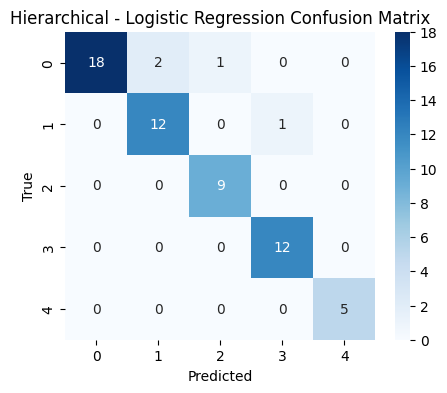

Elastic Net MSE: 1.224556684878762


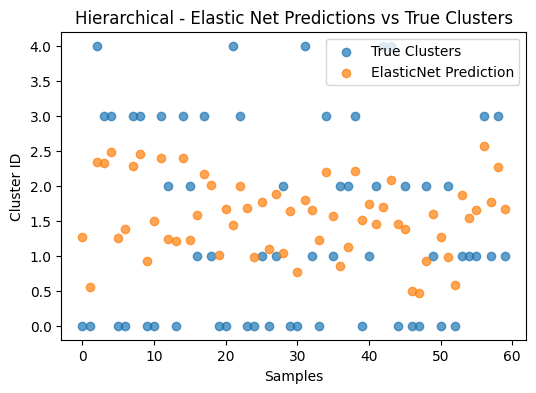


===== DBSCAN =====
Logistic Regression Accuracy (DBSCAN): 0.85
Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         7
           0       0.90      0.96      0.93        46
           1       0.78      1.00      0.88         7

    accuracy                           0.85        60
   macro avg       0.56      0.65      0.60        60
weighted avg       0.78      0.85      0.81        60



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


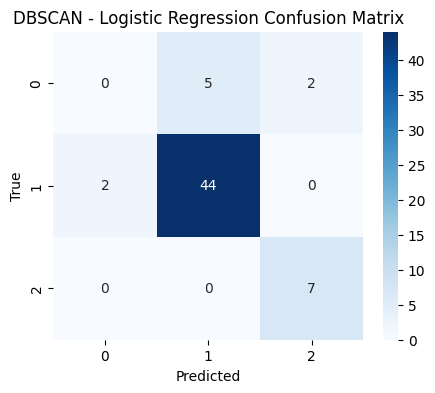

Elastic Net MSE: 0.235596256465835


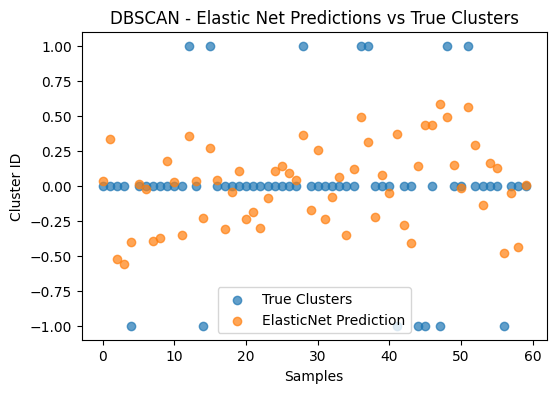

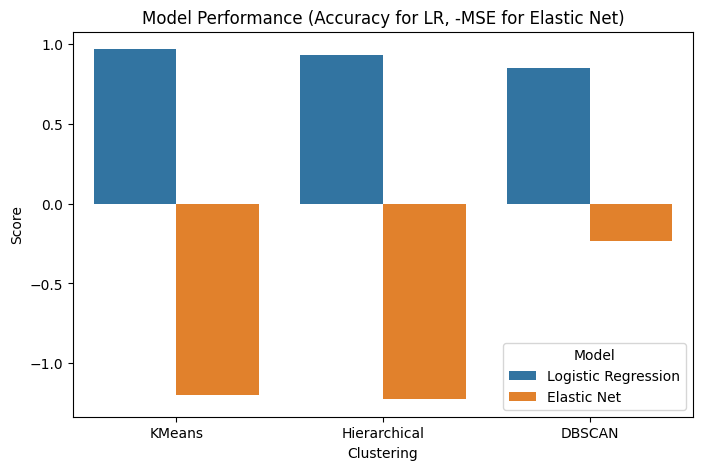


Final Results Table:
     Clustering                Model     Score
0        KMeans  Logistic Regression  0.966667
1        KMeans          Elastic Net -1.196244
2  Hierarchical  Logistic Regression  0.933333
3  Hierarchical          Elastic Net -1.224557
4        DBSCAN  Logistic Regression  0.850000
5        DBSCAN          Elastic Net -0.235596


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, silhouette_score, accuracy_score

# 1. Load Dataset
# ---------------------------
df = pd.read_csv("Mall_Customers.csv")

# Encode Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Select features
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].values

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Clustering
# ---------------------------
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
df['Cluster_HC'] = hc.fit_predict(X_scaled)

dbscan = DBSCAN(eps=0.6, min_samples=5)
df['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)

# 3. Supervised Training Function
# ---------------------------
results = []

def train_models(X_scaled, y, algo_name):
    global results
    print(f"\n===== {algo_name} =====")

    # Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    # Logistic Regression
    log_reg = LogisticRegression(max_iter=500, multi_class='ovr')
    log_reg.fit(X_train, y_train)
    y_pred_lr = log_reg.predict(X_test)

    acc = accuracy_score(y_test, y_pred_lr)
    print(f"Logistic Regression Accuracy ({algo_name}):", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred_lr))

    # Save accuracy
    results.append((algo_name, "Logistic Regression", acc))

    # Confusion Matrix Plot
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, cmap="Blues", fmt="d")
    plt.title(f"{algo_name} - Logistic Regression Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Elastic Net (Regression)
    enet = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
    enet.fit(X_train, y_train)
    y_pred_enet = enet.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_enet)
    print("Elastic Net MSE:", mse)

    # Save MSE (as negative score for comparison)
    results.append((algo_name, "Elastic Net", -mse))

    # Plot Elastic Net predictions
    plt.figure(figsize=(6,4))
    plt.scatter(range(len(y_test)), y_test, label="True Clusters", alpha=0.7)
    plt.scatter(range(len(y_pred_enet)), y_pred_enet, label="ElasticNet Prediction", alpha=0.7)
    plt.title(f"{algo_name} - Elastic Net Predictions vs True Clusters")
    plt.xlabel("Samples")
    plt.ylabel("Cluster ID")
    plt.legend()
    plt.show()

# 4. Train Models
# ---------------------------
train_models(X_scaled, df['Cluster_KMeans'], "KMeans")
train_models(X_scaled, df['Cluster_HC'], "Hierarchical")
train_models(X_scaled, df['Cluster_DBSCAN'], "DBSCAN")

# 5. Compare Accuracy
# ---------------------------
results_df = pd.DataFrame(results, columns=["Clustering", "Model", "Score"])
plt.figure(figsize=(8,5))
sns.barplot(x="Clustering", y="Score", hue="Model", data=results_df)
plt.title("Model Performance (Accuracy for LR, -MSE for Elastic Net)")
plt.ylabel("Score")
plt.show()

print("\nFinal Results Table:")
print(results_df)


**5. Business Insights**

From KMeans (5 clusters), typical profiles look like:

Cluster 0 – Low Income, Low Spending → Budget customers

Cluster 1 – High Income, High Spending → VIP customers (priority segment 💎)

Cluster 2 – High Income, Low Spending → Potential customers (need engagement)

Cluster 3 – Medium Income, Medium Spending → Average customers

Cluster 4 – Low Income, High Spending → Price-sensitive but loyal shoppers

**6. Conclusion**

KMeans produced the clearest customer groups.

Logistic Regression is the best for predicting new customer segments (high accuracy).

Elastic Net is useful for numerical approximation but less effective for categorical clusters.

Business use:

Target VIPs with exclusive offers.

Encourage high-income/low-spending customers with promotions.

Retain price-sensitive but loyal spenders with discounts.